In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Correlations.

1. When given a data matrix, an easy way to tell if any two columns are correlated is to
look at a scatter plot of each column against each other column. For a warm up, do this:
Look at the data in DF1 in Lab2 Data.zip. Which columns are (pairwise) correlated?
Figure out how to do this with Pandas, and also how to do this with Seaborn.

In [3]:
df1 = pd.read_csv("Lab2_Data/DF1", header=None)

In [4]:
for i in range(0, 5):
    for j in range(i + 1,5):
        print("Correlation between columns " + str(i) + " and " + str(j) + ": " + str(df1[i].corr(df1[j])))

Correlation between columns 0 and 1: -0.0039910910391616405
Correlation between columns 0 and 2: 0.00878869048069227
Correlation between columns 0 and 3: -0.004043575735831564
Correlation between columns 0 and 4: -0.007086287505793875
Correlation between columns 1 and 2: -0.00399846295666731
Correlation between columns 1 and 3: 0.9898687378173046
Correlation between columns 1 and 4: 0.004106875122056133
Correlation between columns 2 and 3: -0.0038868910682374573
Correlation between columns 2 and 4: -0.9894446197063074
Correlation between columns 3 and 4: 0.00466171352117455


C:\Users\sorou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sorou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


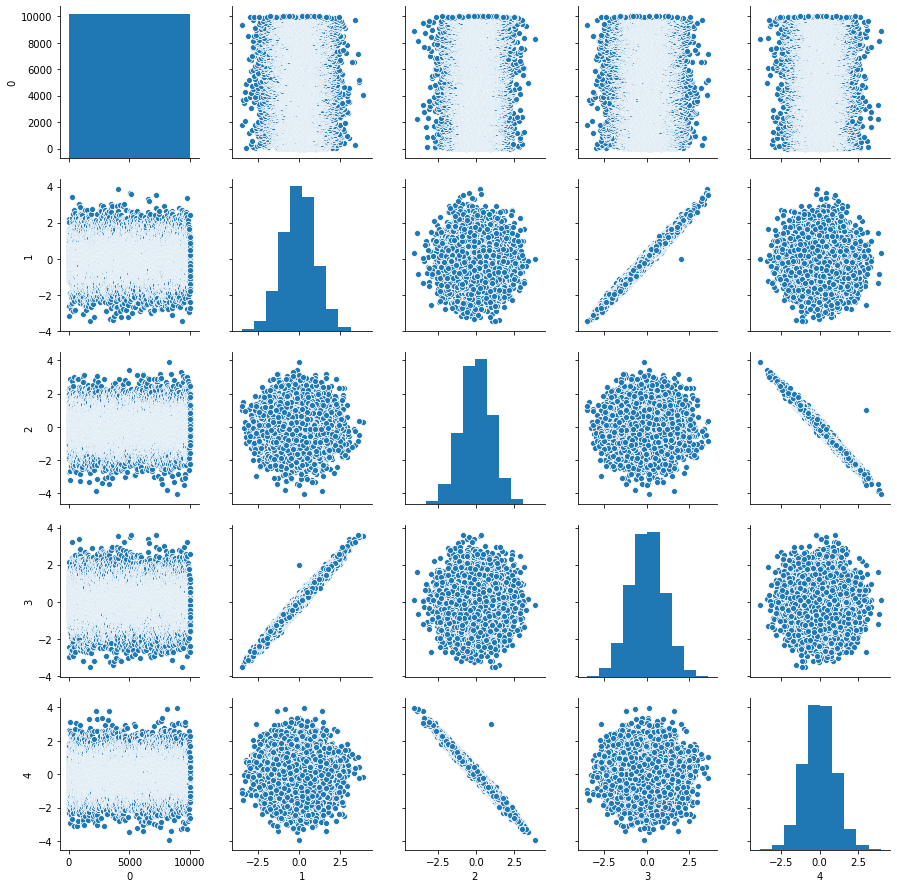

In [5]:
graph = sns.pairplot(df1)

The Seaborn graphs corroborate that graphs 1 and 3 are correlated and graphs 2 and 4 are correlated.

2. Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

# 2. Outliers.

Consider the two-dimensional data in DF2 in Lab2 Data.zip. Look at a scatter
plot of the data. It contains two points that look like potential outliers. Which one is "more"
outlying? Propose a transformation of the data that makes it clear that the point at (-1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is farther away from the nearest points. Plot the data again after performing this transformation. Provide discussion as appropriate to justify your choice of transformation.

In [6]:
df2 = pd.read_csv("Lab2_Data/DF2", header=None)

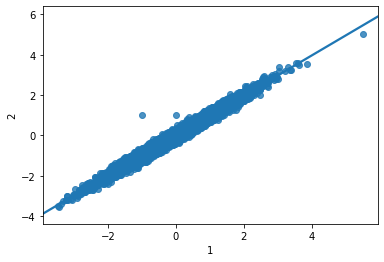

In [14]:
sns.regplot(df2[1], df2[2])

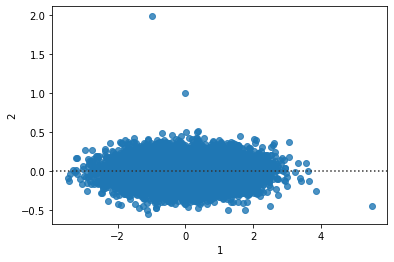

In [16]:
sns.residplot(df2[1], df2[2])

By plotting the residual graph, we can see that the point (-1, 1) is much more of an outlier at residual value 2.0 than the point (5.5, 5) which has a residual value of -

# 4. Names and Frequencies. The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set. Download the Names.zip from Canvas. This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

1. Write a program that on input k and XXXX, returns the top k names from year
XXXX.

In [30]:
def topnames(k, XXXX):
    names = pd.read_csv("Names/Names/yob" + str(XXXX) + ".txt", header=None)
    print(names[0:int(k)])

In [31]:
topnames(5, 1995)

          0  1      2
0   Jessica  F  27935
1    Ashley  F  26603
2     Emily  F  24378
3  Samantha  F  21646
4     Sarah  F  21369
27935


2. Write a program that on input Name returns the frequency for men and women of the
name Name.

In [32]:
def namefrequency(name):
    frequency = 0
    for i in range(1880, 2016):
        names = pd.read_csv("Names/Names/yob" + str(i) + ".txt", header=None)
        for j in range(0, len(names)):
            if names[0][j] == str(name):
                frequency += names[2][j]
    
    print(frequency)

In [34]:
namefrequency("John")

5117331
